<a href="https://colab.research.google.com/github/Suzaq2005/Sentimental-Analysis/blob/main/Sentimental_Analysis_Using_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
stop_words = stopwords.words()

In [4]:
import csv

In [10]:
csvfile="/content/Dataset_2.csv"

In [57]:
df = pd.read_csv(csvfile)#sometimes it will lead to error due to the EOF in the data set...so keep on running more than one time specially running first time run

In [58]:
df.head()

,review,sentiment
0,5 minutes into this movie I was hyperventilati...,positive
1,"it's all very simple. Jake goes to prison, and...",positive
2,What a waste of time! I've tried to sit throug...,positive
3,"This was an interesting movie...half-comedy, h...",negative
4,I am sorry but this is the worst film I have e...,positive


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18701 entries, 0 to 18700
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     18701 non-null  object
 1   sentiment  18701 non-null  object
dtypes: object(2)
memory usage: 292.3+ KB


In [60]:
df.describe().T

,count,unique,top,freq
review,18701,18620,Loved today's show!!! It was a variety and not...,4
sentiment,18701,2,negative,9446


**Checking the datasets**

In [ ]:
# Checking for any null entries in dataset
print("\nIs the dataset having any null entries?")
print(df.isnull().values.any())
# Printing dataset dimensions
print("\nDataset dimensions")
print(df.shape)
# First 5 entries in datatset
print("\nFirst 5 entries in datatset")
print(df.head())


# **EDA**

In [62]:
'sentiment' in df.columns

True

In [63]:
# Displaying number of positive and negative reviews in dataset csv file.
print("\nFollowing are the number of positive and negative reviews in dataset")
#sentiment count:
df['sentiment'].value_counts()


Following are the number of positive and negative reviews in dataset


negative    9446
positive    9255
Name: sentiment, dtype: int64

# **Data Manipulations**

In [64]:
df.rename(columns={'review':'text'}, inplace = True)
df

,text,sentiment
0,5 minutes into this movie I was hyperventilati...,positive
1,"it's all very simple. Jake goes to prison, and...",positive
2,What a waste of time! I've tried to sit throug...,positive
3,"This was an interesting movie...half-comedy, h...",negative
4,I am sorry but this is the worst film I have e...,positive
...,...,...
18696,Angels and Demons: 3 out of 10: Clearly someth...,negative
18697,"Meh, Sums it all up for me really. Boring stor...",negative
18698,Schoolies is a pointless exercise... Go to Gol...,negative
18699,I have not seen this movie in ages but figured...,negative


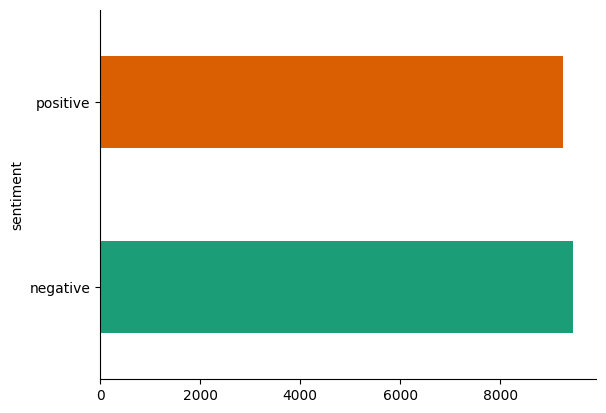

In [65]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Cleaning the data by removing URLs, numbers, special Characters, punctuations, New line etc**

In [66]:
def cleaning(text):
    # Data cleaning by executing lowercase, removing URL links, special characters, and punctuations...
    text = text.lower() # changing to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # Eliminating URL links
    text = re.sub(r"\b\d+\b", "", text) # Eliminating number
    text = re.sub('<.*?>+', '', text) # Eliminating special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Eliminating punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #Eliminating special emotions such as emoticons:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons etc
                           u"\U0001F300-\U0001F5FF"  # symbols and pictographs etc
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols etc
                           u"\U0001F1E0-\U0001F1FF"  # flags etc
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # Changing short forms that are written in english into full forms:

    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)

    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    return text

clean_Data = df['text'].apply(cleaning)

In [67]:
df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
18696    negative
18697    negative
18698    negative
18699    negative
18700    negative
Name: sentiment, Length: 18701, dtype: object

In [68]:
clean_Data = pd.DataFrame(clean_Data)
clean_Data['sentiment']=df['sentiment']
clean_Data

,text,sentiment
0,minutes into this movie i was hyperventilatin...,positive
1,its all very simple jake goes to prison and sp...,positive
2,what a waste of time ive tried to sit through ...,positive
3,this was an interesting moviehalfcomedy halfpo...,negative
4,i am sorry but this is the worst film i have e...,positive
...,...,...
18696,angels and demons out of clearly something b...,negative
18697,meh sums it all up for me really boring story ...,negative
18698,schoolies is a pointless exercise go to gold c...,negative
18699,i have not seen this movie in ages but figured...,negative


In [69]:
# remove stop word:
clean_Data['no_sw'] = clean_Data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [70]:
clean_Data

,text,sentiment,no_sw
0,minutes into this movie i was hyperventilatin...,positive,minutes movie hyperventilating shaking writhin...
1,its all very simple jake goes to prison and sp...,positive,simple jake prison spends years chess masters ...
2,what a waste of time ive tried to sit through ...,positive,waste time ive sky captain times time minutes ...
3,this was an interesting moviehalfcomedy halfpo...,negative,interesting moviehalfcomedy halfpolitical thri...
4,i am sorry but this is the worst film i have e...,positive,sorry worst film life believe making series bu...
...,...,...,...
18696,angels and demons out of clearly something b...,negative,angels demons happened ron howard wronghoward ...
18697,meh sums it all up for me really boring story ...,negative,meh sums boring story bland dialogue dull acti...
18698,schoolies is a pointless exercise go to gold c...,negative,schoolies pointless exercise gold coast drunk ...
18699,i have not seen this movie in ages but figured...,negative,movie ages figured id comment memory disliking...


#Working with the most Frequent Words:

In [ ]:

from collections import Counter
cnt = Counter()
for text in clean_Data["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

# Eliminating the words that are occurring frequently:

In [72]:

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    #custom function to remove the words that are frequent in numbers
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
clean_Data["wo_stopfreq"] = clean_Data["no_sw"].apply(lambda text: remove_freqwords(text))
clean_Data.head()

,text,sentiment,no_sw,wo_stopfreq
0,minutes into this movie i was hyperventilatin...,positive,minutes movie hyperventilating shaking writhin...,minutes hyperventilating shaking writhing pain...
1,its all very simple jake goes to prison and sp...,positive,simple jake prison spends years chess masters ...,simple jake prison spends years chess masters ...
2,what a waste of time ive tried to sit through ...,positive,waste time ive sky captain times time minutes ...,waste ive sky captain times minutes start down...
3,this was an interesting moviehalfcomedy halfpo...,negative,interesting moviehalfcomedy halfpolitical thri...,interesting moviehalfcomedy halfpolitical thri...
4,i am sorry but this is the worst film i have e...,positive,sorry worst film life believe making series bu...,sorry worst life believe making series budget ...


In [73]:
clean_Data['no_sw'].loc[5]

'documentary unlike layers shows analyze impossible documentarian william greaves shows process filmmaking different perspective struggles actors director sound crew hang make film successful movie made ordinary greaves make complex crew film actors filmed crew crew film cameras different goal dizzying affect time exciting parts crew organizes discusses dark greaves half experiment half sees chaotic confusing failure matter side choose argue greaves involved process'

In [74]:
clean_Data['wo_stopfreq'].loc[5]

'documentary unlike layers shows analyze impossible documentarian william greaves shows process filmmaking different perspective struggles actors director sound crew hang successful ordinary greaves complex crew actors filmed crew crew cameras different goal dizzying affect exciting parts crew organizes discusses dark greaves half experiment half sees chaotic confusing failure matter side choose argue greaves involved process'

 **Lemmatization**: converting the word to its base form

In [75]:
# It helps to create better features for machine learning and NLP models
wordnet_lem = WordNetLemmatizer()


In [76]:
clean_Data

,text,sentiment,no_sw,wo_stopfreq
0,minutes into this movie i was hyperventilatin...,positive,minutes movie hyperventilating shaking writhin...,minutes hyperventilating shaking writhing pain...
1,its all very simple jake goes to prison and sp...,positive,simple jake prison spends years chess masters ...,simple jake prison spends years chess masters ...
2,what a waste of time ive tried to sit through ...,positive,waste time ive sky captain times time minutes ...,waste ive sky captain times minutes start down...
3,this was an interesting moviehalfcomedy halfpo...,negative,interesting moviehalfcomedy halfpolitical thri...,interesting moviehalfcomedy halfpolitical thri...
4,i am sorry but this is the worst film i have e...,positive,sorry worst film life believe making series bu...,sorry worst life believe making series budget ...
...,...,...,...,...
18696,angels and demons out of clearly something b...,negative,angels demons happened ron howard wronghoward ...,angels demons happened ron howard wronghoward ...
18697,meh sums it all up for me really boring story ...,negative,meh sums boring story bland dialogue dull acti...,meh sums boring bland dialogue dull action sce...
18698,schoolies is a pointless exercise go to gold c...,negative,schoolies pointless exercise gold coast drunk ...,schoolies pointless exercise gold coast drunk ...
18699,i have not seen this movie in ages but figured...,negative,movie ages figured id comment memory disliking...,ages figured id comment memory disliking inten...


In [77]:
import nltk

In [78]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [79]:
clean_Data['wo_stopfreq_lem'] = clean_Data['wo_stopfreq'].apply(wordnet_lem.lemmatize)
clean_Data

,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,minutes into this movie i was hyperventilatin...,positive,minutes movie hyperventilating shaking writhin...,minutes hyperventilating shaking writhing pain...,minutes hyperventilating shaking writhing pain...
1,its all very simple jake goes to prison and sp...,positive,simple jake prison spends years chess masters ...,simple jake prison spends years chess masters ...,simple jake prison spends years chess masters ...
2,what a waste of time ive tried to sit through ...,positive,waste time ive sky captain times time minutes ...,waste ive sky captain times minutes start down...,waste ive sky captain times minutes start down...
3,this was an interesting moviehalfcomedy halfpo...,negative,interesting moviehalfcomedy halfpolitical thri...,interesting moviehalfcomedy halfpolitical thri...,interesting moviehalfcomedy halfpolitical thri...
4,i am sorry but this is the worst film i have e...,positive,sorry worst film life believe making series bu...,sorry worst life believe making series budget ...,sorry worst life believe making series budget ...
...,...,...,...,...,...
18696,angels and demons out of clearly something b...,negative,angels demons happened ron howard wronghoward ...,angels demons happened ron howard wronghoward ...,angels demons happened ron howard wronghoward ...
18697,meh sums it all up for me really boring story ...,negative,meh sums boring story bland dialogue dull acti...,meh sums boring bland dialogue dull action sce...,meh sums boring bland dialogue dull action sce...
18698,schoolies is a pointless exercise go to gold c...,negative,schoolies pointless exercise gold coast drunk ...,schoolies pointless exercise gold coast drunk ...,schoolies pointless exercise gold coast drunk ...
18699,i have not seen this movie in ages but figured...,negative,movie ages figured id comment memory disliking...,ages figured id comment memory disliking inten...,ages figured id comment memory disliking inten...


Cleaning Process Done! now  we can move to the next step:
# Applying Naive bayes' modeling!

# Executing Tokens


In [80]:
# create the cleaned data for the train-test split:
nb=clean_Data.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,review
0,1,minutes hyperventilating shaking writhing pain...
1,1,simple jake prison spends years chess masters ...
2,1,waste ive sky captain times minutes start down...
3,0,interesting moviehalfcomedy halfpolitical thri...
4,1,sorry worst life believe making series budget ...
...,...,...
18696,0,angels demons happened ron howard wronghoward ...
18697,0,meh sums boring bland dialogue dull action sce...
18698,0,schoolies pointless exercise gold coast drunk ...
18699,0,ages figured id comment memory disliking inten...


In [81]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [minutes, hyperventilating, shaking, writhing,...
1    [simple, jake, prison, spends, years, chess, m...
2    [waste, ive, sky, captain, times, minutes, sta...
3    [interesting, moviehalfcomedy, halfpolitical, ...
4    [sorry, worst, life, believe, making, series, ...
Name: review, dtype: object

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [83]:
text_counts

<18701x116021 sparse matrix of type '<class 'numpy.int64'>'
	with 1367566 stored elements in Compressed Sparse Row format>

**Train-test Split**

In [84]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [85]:
 X_test

<3741x116021 sparse matrix of type '<class 'numpy.int64'>'
	with 278864 stored elements in Compressed Sparse Row format>

In [86]:
X_train

<14960x116021 sparse matrix of type '<class 'numpy.int64'>'
	with 1088702 stored elements in Compressed Sparse Row format>

# **Navies Bayes model implementation:**

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [88]:
 import matplotlib.pyplot as plt

In [89]:
import warnings
warnings.filterwarnings("ignore")

**Complement Naive Bayes' model**

In [90]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
confusion_matCNB = metrics.confusion_matrix(y_test, predicted)
print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 85.91%
------------------------------------------------
Confusion Matrix:
      0     1
0  1669   251
1   276  1545
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1920
           1       0.86      0.85      0.85      1821

    accuracy                           0.86      3741
   macro avg       0.86      0.86      0.86      3741
weighted avg       0.86      0.86      0.86      3741



**Mutilnominal NB model**

In [91]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
confusion_matMNB = metrics.confusion_matrix(y_test, predicted)
print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 85.91%
------------------------------------------------
Confusion Matrix:
      0     1
0  1669   251
1   276  1545
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1920
           1       0.86      0.85      0.85      1821

    accuracy                           0.86      3741
   macro avg       0.86      0.86      0.86      3741
weighted avg       0.86      0.86      0.86      3741



 **Bernoulli NB model**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)
confusion_matBNB = metrics.confusion_matrix(y_test, predicted)
print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))



# **Plotting Confusion Matrices:**
Plotting confusion matrix for CNB, MNB, BNB model:

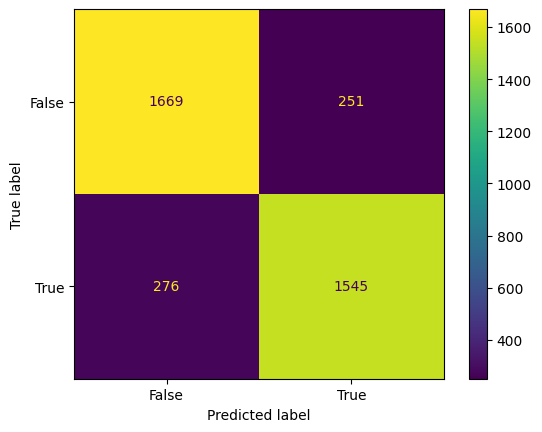

In [93]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matCNB, display_labels = [False, True])
cm_display.plot()
plt.show()

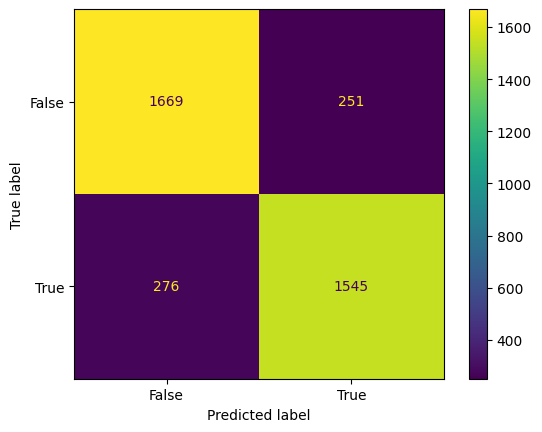

In [94]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matMNB, display_labels = [False, True])
cm_display.plot()
plt.show()

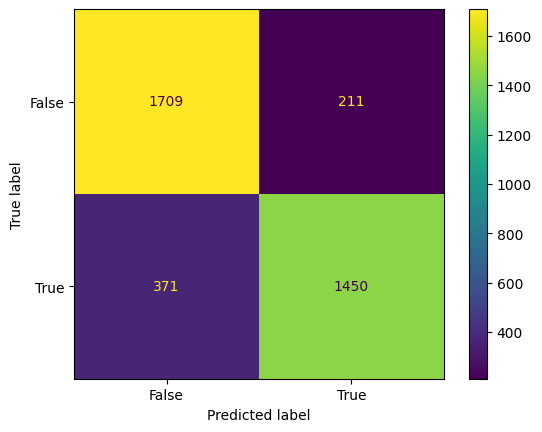

In [95]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matBNB, display_labels = [False, True])
cm_display.plot()
plt.show()

0.9213342886234669 0.9213341456159619 0.9230167719201905


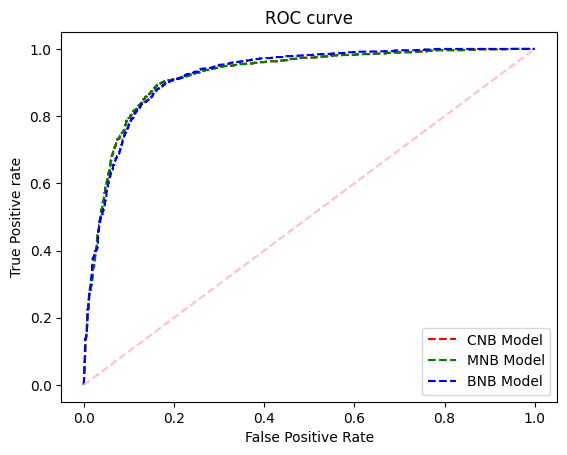

In [96]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models:
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ** Applying Term Frequency-Inverse Document Frequency (TF-IDF)**

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['review'])

In [98]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['sentiment'],test_size=0.20,random_state=30)

In [99]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 85.73%


In [100]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 84.44%


In [101]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 85.86%
